# Interpolation using Verde

In this notebook we are going to interpolate the concentration of cobalt in soil samples from Nunivak Island in southwest Alaska. All we need to do this is `geopandas` for reading in spatial data, `matplotlib` to plot up the maps, `verde` to interpolate between samples, and `contextily` for making a nice basemap in our final plot. Let's get started!

For a quick background on how `verde.Spline` works check out the documentation at https://www.fatiando.org/verde/v1.0.0/api/generated/verde.Spline.html

In [ ]:
! pip install verde
! pip install contextily

In [1]:
import geopandas as gpd  # reading in the shapefile
import matplotlib.pyplot as plt  # plotting it all up
import verde as vd  # gridding and fitting a spline to the data
import contextily as ctx  # grabbing a basemap for plotting

%matplotlib inline

After importing our packages, let's read in the data using `geopandas`

In [2]:
data = gpd.read_file("geochemistry_subset.shp")
data.drop(
    index=[3, 16], inplace=True
)

Next, let's create our `Spline` with `verde` and fit it to the x, y, and z values for each sample. To access x and y values in `geopandas` use `data.geometry.x` and `data.geometry.y`

In [3]:
spline = vd.Spline()  # create the spline
spline.fit(
    (data.geometry.x, data.geometry.y), data.qvalue
)  # fit the spline to the data

Spline(damping=None, engine='auto',
    force_coords=(array([-18613493.83183, -18495540.81258, -18586298.48023, -18608013.5733 ,
       -18436088.41214, -18569552.68923, -18526132.52185, -18469458.65589,
       -18454187.84814, -18502578.43079, -18536920.4937 , -18459544.54204,
       -18496070.69336, -18499868.91439, -18567739.29473, -18..., 8354109.30719, 8446829.43237, 8406103.66232,
       8413494.23597, 8382741.21491, 8416363.28695])),
    mindist=1e-05)

After fitting our spline, let's go ahead and interpolate the spline to a regular grid. The `spacing` option controls the size of the grid cells. Then let's do a quick visualize to see what the interpolated data looks like

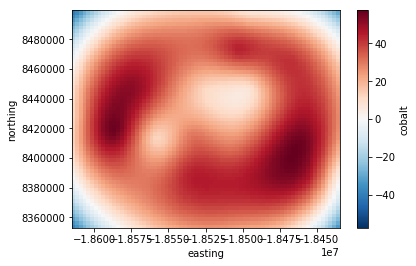

In [4]:
grid = spline.grid(spacing=2500, data_names=["cobalt"])  # creating the grid
grid.cobalt.plot.pcolormesh(cmap="RdBu_r")  # plot up the grid

This next cell uses `contextily` to grab the stamen terrain tiles from the web and use them as a basemap

In [5]:
# this cell creates a function that grabs the stamen terrain tiles
def add_basemap(
    ax, zoom, url="http://tile.stamen.com/terrain/tileZ/tileX/tileY.png"
):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(
        xmin, ymin, xmax, ymax, zoom=zoom, url=url
    )
    ax.imshow(basemap, extent=extent, interpolation="bilinear")
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

Finally, let's plot up the interpolated data with the original points, color them the same, with the same scale, and throw a basemap underneath. You can see the grid when we turn down the opacity on the `pcolormesh` using `alpha=0.4`, so we just make all the edges of the grids white. Amazing how fast and painless it was using `verde` to create this spline.

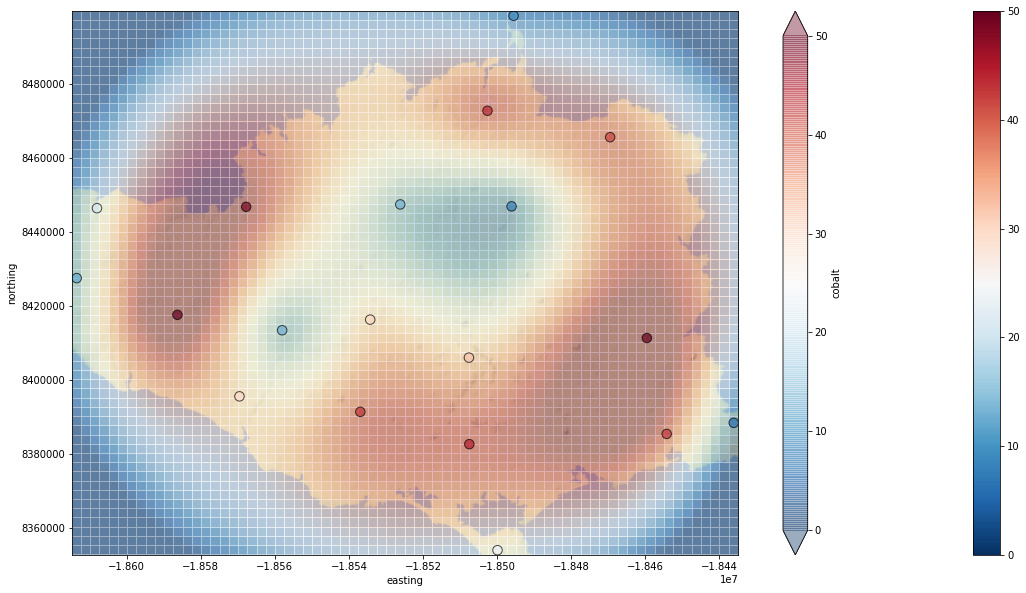

In [6]:
ax = data.plot(
    column="qvalue",
    vmin=0,
    vmax=50,
    figsize=(20, 10),
    legend=True,
    cmap="RdBu_r",
    alpha=0.7,
    edgecolor="black",
    markersize=90,
    zorder=2,
)
add_basemap(ax, zoom=9)  # add our basemap to the plot
grid.cobalt.plot.pcolormesh(
    cmap="RdBu_r",
    ax=ax,
    alpha=0.4,
    vmin=0,
    vmax=50,
    edgecolor=(1.0, 1.0, 1.0, 1.0),
    linewidth=0.01,
    zorder=1,
)  # plot up the grid

This notebook is licensed as CC-BY, use and share to your hearts content.